<a href="https://colab.research.google.com/github/AI-Amponsah/AI-Amponsah/blob/main/Driver_Drowsiness_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

In [50]:
import numpy as np
import tensorflow_datasets as tfds
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras import layers
from google.colab import drive


In [51]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# load datasets

In [53]:
train_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset_new/train",
    shuffle=True,
    batch_size=32
)

Found 2467 files belonging to 4 classes.


In [54]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset_new/test",
    shuffle=True,
    batch_size=32
)

Found 433 files belonging to 4 classes.


In [3]:
# printing classes

In [55]:
class_names = test_set.class_names
class_names

['Closed', 'Open', 'no_yawn', 'yawn']

In [56]:
class_names = train_set.class_names
class_names

['Closed', 'Open', 'no_yawn', 'yawn']

In [37]:
# len(test_set)

14

In [ ]:
# len(train_set)

In [57]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])


In [58]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])


In [59]:
train_set = train_set.map(lambda x, y: (resize_and_rescale(x), y))
train_set = train_set.map(lambda x, y: (data_augmentation(x, training=True), y))

test_set = test_set.map(lambda x, y: (resize_and_rescale(x), y))


In [ ]:
# printing the values of a batch

In [60]:
for image_batch, label_batch in train_set.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 180, 180, 3)
[3 1 3 1 0 0 1 0 3 2 0 1 3 2 2 3 1 2 3 2 2 0 3 3 2 3 0 2 1 1 2 3]


In [ ]:
for image_batch, label_batch in train_set.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    # plt.show()

In [62]:
# Building Model

In [64]:
model = tf.keras.Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(class_names))
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 10
history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/10
78/78 [==============================] - 117s 1s/step - loss: 0.7946 - accuracy: 0.6291 - val_loss: 0.5327 - val_accuracy: 0.7344
Epoch 2/10
78/78 [==============================] - 110s 1s/step - loss: 0.5120 - accuracy: 0.7410 - val_loss: 0.4620 - val_accuracy: 0.7529
Epoch 3/10
78/78 [==============================] - 110s 1s/step - loss: 0.4397 - accuracy: 0.7767 - val_loss: 0.4567 - val_accuracy: 0.7737
Epoch 4/10
78/78 [==============================] - 113s 1s/step - loss: 0.4396 - accuracy: 0.7706 - val_loss: 0.4224 - val_accuracy: 0.7806
Epoch 5/10
78/78 [==============================] - 109s 1s/step - loss: 0.4139 - accuracy: 0.7844 - val_loss: 0.4510 - val_accuracy: 0.7413
Epoch 6/10
78/78 [==============================] - 110s 1s/step - loss: 0.4061 - accuracy: 0.7815 - val_loss: 0.4217 - val_accuracy: 0.7783
Epoch 7/10
78/78 [==============================] - 108s 1s/step - loss: 0.3779 - accuracy: 0.8014 - val_loss: 0.4227 - val_accuracy: 0.7991
Epoch 8/10
78

In [65]:
# Model Evaluation

In [66]:
test_loss, test_accuracy = model.evaluate(test_set)

print("Test Accuracy:",test_accuracy )
print("Test Loss:", test_loss)


14/14 [==============================] - 6s 297ms/step - loss: 0.3821 - accuracy: 0.8291
Test Accuracy: 0.8290992975234985
Test Loss: 0.38205957412719727


In [67]:
prediction = model.predict(test_set)

14/14 [==============================] - 8s 417ms/step


In [70]:
model.save('/content/drive/MyDrive/dataset_new/driver_drowsiness_modelCNN.h5')

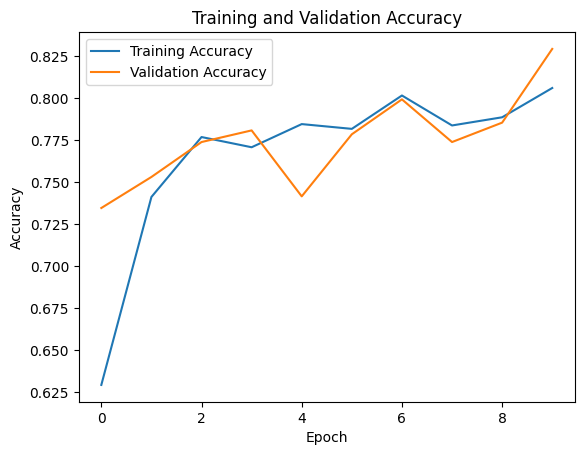

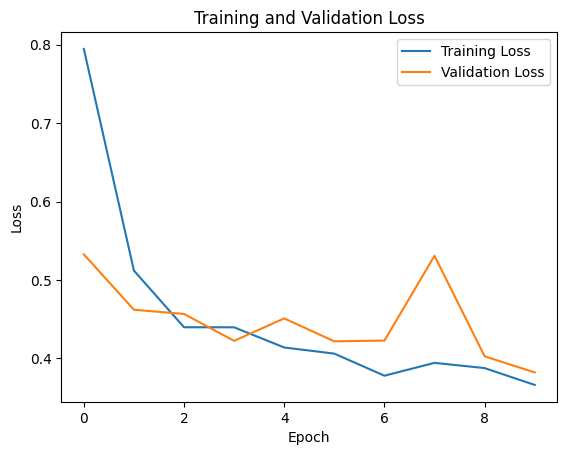

In [71]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



In [72]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 22, 22, 64)       